In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras.datasets import fashion_mnist
type(fashion_mnist.load_data())

4431872/4422102 [==============================] - 0s 0us/step


tuple

In [3]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

In [4]:
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


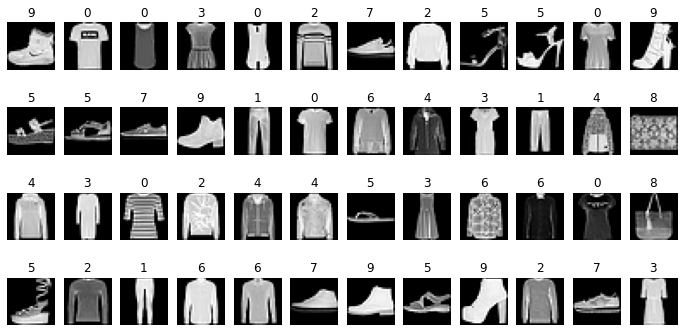

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))

for index in range(48):

  plt.subplot(4, 12, index + 1)
  plt.imshow(x_train[index], cmap = 'gray')
  plt.axis('off')
  plt.title(str(t_train[index]))

plt.show()

In [6]:
s = np.arange(len(x_train))

print(s)

np.random.shuffle(s)

print(s)

x_train = x_train[s]
t_train = t_train[s]

[    0     1     2 ... 59997 59998 59999]
[41816 29305 13572 ... 41471  5001 20423]


In [7]:
TEST_SPLIT_RATIO = 0.15

test_nums = int(TEST_SPLIT_RATIO * len(x_train))

print('test_nums = ', test_nums)

x_test = x_train[:test_nums]
t_test = t_train[:test_nums]

x_train = x_train[test_nums:]
t_train = t_train[test_nums:]

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

test_nums =  9000
(51000, 28, 28) (51000,)
(9000, 28, 28) (9000,)


In [8]:
VAL_SPLIT_RATIO = 0.15

val_nums = int(VAL_SPLIT_RATIO * len(x_train))

print('val_nums =', val_nums)

x_val = x_train[:val_nums]
t_val = t_train[:val_nums]

x_train = x_train[val_nums:]
t_train = t_train[val_nums:]

print(x_train.shape, t_train.shape)
print(x_val.shape, t_val.shape)

val_nums = 7650
(43350, 28, 28) (43350,)
(7650, 28, 28) (7650,)


In [9]:
print(x_train.shape, t_train.shape)
print(x_val.shape, t_val.shape)
print(x_test.shape, t_val.shape)

(43350, 28, 28) (43350,)
(7650, 28, 28) (7650,)
(9000, 28, 28) (7650,)


In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

print('train max = ', x_train[0].max(), 'train min = ', x_train[0].min())
print('test max = ', x_test[0].max(), 'test min = ', x_test[0].min())

train max =  0.996078431372549 train min =  0.0
test max =  1.0 test min =  0.0


In [13]:
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)
t_val = to_categorical(t_val, 10)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28, 1)))

model.add(Dense(50, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = SGD(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start = datetime.now()

hist = model.fit(x_train, t_train, epochs = 30, validation_data = (x_val, t_val))

end = datetime.now()

print('elapsed time => ', end-start)

Epoch 1/30
1355/1355 [==============================] - 4s 2ms/step - loss: 0.8495 - accuracy: 0.7248 - val_loss: 0.6077 - val_accuracy: 0.7941
Epoch 2/30
1355/1355 [==============================] - 3s 2ms/step - loss: 0.5650 - accuracy: 0.8087 - val_loss: 0.5368 - val_accuracy: 0.8055
Epoch 3/30
1355/1355 [==============================] - 3s 2ms/step - loss: 0.5109 - accuracy: 0.8244 - val_loss: 0.4916 - val_accuracy: 0.8247
Epoch 4/30
1355/1355 [==============================] - 3s 2ms/step - loss: 0.4824 - accuracy: 0.8347 - val_loss: 0.4888 - val_accuracy: 0.8290
Epoch 5/30
1355/1355 [==============================] - 3s 2ms/step - loss: 0.4642 - accuracy: 0.8400 - val_loss: 0.4500 - val_accuracy: 0.8459
Epoch 6/30
1355/1355 [==============================] - 3s 2ms/step - loss: 0.4504 - accuracy: 0.8441 - val_loss: 0.4362 - val_accuracy: 0.8495
Epoch 7/30
1355/1355 [==============================] - 3s 2ms/step - loss: 0.4381 - accuracy: 0.8488 - val_loss: 0.4303 - val_accuracy:

In [ ]:
model.evaluate(x_test, t_test)

282/282 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8722


[0.3658561706542969, 0.8722222447395325]

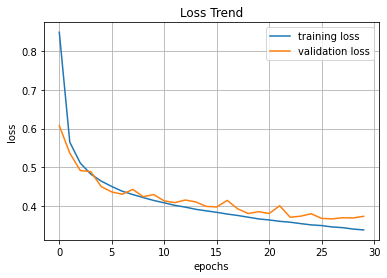

In [ ]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

In [ ]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'training ')

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor = 'val_loss',
                             factor = 0.5,
                             patience = 5, # 5번동안 참는것 -> 5번동안 해결되지 않으면 반으로 줄이라는 뜻
                             verbose = 1)

hist = model.fit(x_train, y_train,
                 epochs = 50, validation_split = 0.2,
                 callbacks = [reduceLR])